# LIBS AND PATHS

## LIBS

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import xvgstuff
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import seaborn as sb;
import pandas as pd
import scipy.ndimage as ndimage
from scipy import stats
import sys
import MDAnalysis as mda
import gromacs
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt

In [2]:
reload(xvgstuff)

<module 'xvgstuff' from '/home/carlo/programs/anaconda2/lib/python2.7/xvgstuff.pyc'>

## QUICK PATHS

In [3]:
#protx1_metad_1ang="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/METAD_2walls_1angle_check"
#protx1_metad_2ang="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/METAD_2walls_2angle_check"
protx1_classic="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/protx1_Umbrella_1D_branched_gromos54a7/umbrella_branch_left/npt/2.4"
#protx1_wt_1ang="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/wt_2walls_1angle_check"
#protx1_wt_2ang="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/wt_2walls_2angle_check"

####CLASSICAL MD####
protx1_classical_left="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/protx1_Umbrella_1D_branched_gromos54a7/umbrella_branch_left/npt/"
protx1_classical_right="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/protx1_Umbrella_1D_branched_gromos54a7/umbrella_branch_right/npt/"
protx1_classical_upsd="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/protx1_Umbrella_1D_branched_gromos54a7/umbrella_branch_upsidedown/npt/"
protx1_classical_casual="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/protx1_Umbrella_1D_branched_gromos54a7/umbrella_casualconf/P_equil/P_equil_K=500"

####these were originally 30 bias, but had to increase to 40 cause they were not moving####
protx1_wt_1ang_40b="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/zzOLD_TRIALS/WTMETAD_2walls_1angle_30bias"
protx1_wt_2ang_40b="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/zzOLD_TRIALS/WTMETAD_2walls_2angle_30bias"
####40b extension####
protx1_wt_1ang_ex="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/zzOLD_TRIALS/WTMETAD_2walls_1angle_extendto35bias"
protx1_wt_2ang_ex="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/zzOLD_TRIALS/WTMETAD_2walls_2angle_extendto35bias"

####nw=new_walls####
protx1_wt_1ang_40b_wall36="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/zzOLD_TRIALS/WTMETAD_NEW-WALLS_1angle_40bias"
protx1_wt_2ang_40b_wall36="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/zzOLD_TRIALS/WTMETAD_NEW-WALLS_2angle_40bias"

####BEMetad####
protx1_be_40b_wall36="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/BEMETAD_NEW-WALLS_2angles_40bias"
protx1_be_60b_wall36="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/BEMETAD_NEW-WALLS_2angles_60bias"
protx1_be_40b_wall44="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/BEMETAD_2angles_bias-40_Walls-4.4"
protx1_be_60b_wall44="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/BEMETAD_2angles_bias-60_Walls-4.4"

####PBMetad####
protx1_pb_3ang_40b="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/PBMETAD_PROTX1.angles-abg_bias-40_wall-4.6_magnus"
protx1_pb_3ang_60b="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/PBMETAD_PROTX1.angles-abg_bias-60_wall-4.6_magnus"
protx1_pb_3ang_100b="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/PBMETAD_PROTX1.angles-abg_bias-100_wall-4.6_magnus"
protx1_pb_3ang_40b_gromos54a8="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/GROMOS54a8_PBMETAD_PROTX1.angles-abg_bias-40_wall-4.6_magnus"
protx1_pb_3ang_60b_gromos54a8="/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/GROMOS54a8_PBMETAD_PROTX1.angles-abg_bias-60_wall-4.6_magnus"

# ANGLE ANALYSIS

In [3]:
def plot_2d_map_plotly (filein):
    df=xvgstuff.read_angle_matrix(filein)
    Z = ndimage.gaussian_filter(df.values, sigma=2, order=0) 
    trace=go.Contour(
        z=Z,
        line=dict(smoothing=0),
        colorscale='Jet'
    )
    figplane = tools.make_subplots(rows=1, cols=1)
    figplane.append_trace(trace, 1, 1)
    figplane['layout'].update(height=400, width=450, title='Angle Maps', 
                     font=dict(family='Arial', size=15,),
                     margin=go.layout.Margin(l=70,r=70, b=70,t=70,pad=5),
                     legend=dict(orientation= 'v', y=1, font=dict(family='sans-serif', size=8, color='#000')
                                ),
                     )
    py.offline.iplot(figplane)

In [4]:
def merge_columns_in_df (file1,file2,col_range1=0,col_range2=0,round1=0,round2=0):
    data1 = []
    data2 = []
    dot=':'
    with open(file1) as fd1:
        for line in fd1:
            if line.startswith('#') or line.startswith('@'):
                continue
            data1.append(line)        
    df1=pd.DataFrame(data=np.loadtxt(data1))
    fd1.close

    with open(file2) as fd2:
        for line in fd2:
            if line.startswith('#') or line.startswith('@'):
                continue
            data2.append(line)        
    df2=pd.DataFrame(data=np.loadtxt(data2))
    fd2.close

    #CHECKS FOR EXTRA FLAGS
    ## COL_RANGES
    if col_range1==0 :
        col_range1_min=0
        col_range1_max=df1.shape[1]
        col_range1=range(0,col_range1_max)     
    if col_range2==0 :
        col_range2_min=0
        col_range2_max=df2.shape[1]
        col_range2=range(0,col_range2_max)
        
    ## ROUNDING     
    if round1!=0 :
        df1[round1[0]]=df1[round1[0]]=df1[round1[0]].round(round1[1])
    if round2 !=0 :
        df2[round2[0]]=df2[round2[0]]=df2[round2[0]].round(round2[1])
        
    df_merge = pd.merge(df1.loc[0:df1.shape[0],col_range1], df2.loc[0:df2.shape[0],col_range2], on=0,how='inner')
    df_merge
    return df_merge

merge_columns_in_df(file1='angles.dat',file2='COLVAR',round1=[0,1],round2=[0,1])


IOError: [Errno 2] No such file or directory: 'angles.dat'

#### CLASSICAL MD

In [60]:
%cd $protx1_classical_left
plot_2d_map_plotly('2.4/angles.dat')
angles_protx1_classical_left=xvgstuff.read_angle_matrix('2.4/angles.dat')
Z_classic_left = ndimage.gaussian_filter(angles_protx1_classical_left.values, sigma=2, order=0) 

%cd $protx1_classical_right
angles_protx1_classical_right=xvgstuff.read_angle_matrix('2.4/angles.dat')
Z_classic_right = ndimage.gaussian_filter(angles_protx1_classical_right.values, sigma=2, order=0) 

%cd $protx1_classical_upsd
angles_protx1_classical_upsd=xvgstuff.read_angle_matrix('2.4/angles.dat')
Z_classic_upsd = ndimage.gaussian_filter(angles_protx1_classical_upsd.values, sigma=2, order=0) 

%cd $protx1_classical_casual
angles_protx1_classical_casual=xvgstuff.read_angle_matrix('2.4/angles.dat')
Z_classic_casual = ndimage.gaussian_filter(angles_protx1_classical_casual.values, sigma=2, order=0) 


/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/protx1_Umbrella_1D_branched_gromos54a7/umbrella_branch_left/npt
1.4401183378017297
This is the format of your plot grid:
[ (1,1) x1,y1 ]



1.4401183378017297
/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/protx1_Umbrella_1D_branched_gromos54a7/umbrella_branch_right/npt
1.473645442834225
/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/protx1_Umbrella_1D_branched_gromos54a7/umbrella_branch_upsidedown/npt
1.7450860469469223
/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/protx1_Umbrella_1D_branched_gromos54a7/umbrella_casualconf/P_equil/P_equil_K=500
1.7853558719497473


The maximum of z 0 which is a  (181, 181) matrix is:  0.0022332795352521737
The maximum of z 1 which is a  (181, 181) matrix is:  0.0022332795352521737
The maximum of z 0 which is a  (181, 181) matrix is:  0.0013974676382879944
The maximum of z 1 which is a  (181, 181) matrix is:  0.0013974676382879944
The maximum of z 0 which is a  (181, 181) matrix is:  0.0017101204727690243
The maximum of z 1 which is a  (181, 181) matrix is:  0.0017101204727690243
The maximum of z 0 which is a  (181, 181) matrix is:  0.003706835804124669
The maximum of z 1 which is a  (181, 181) matrix is:  0.003706835804124669


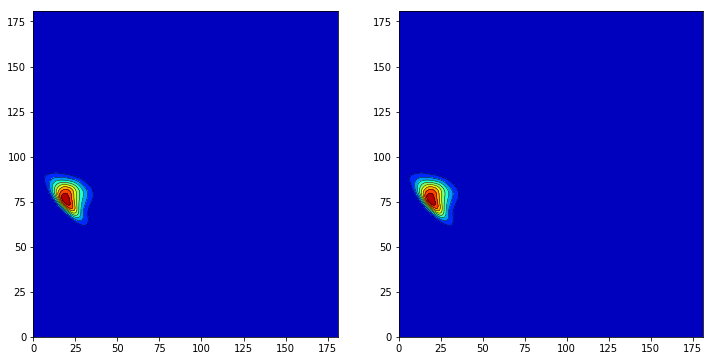

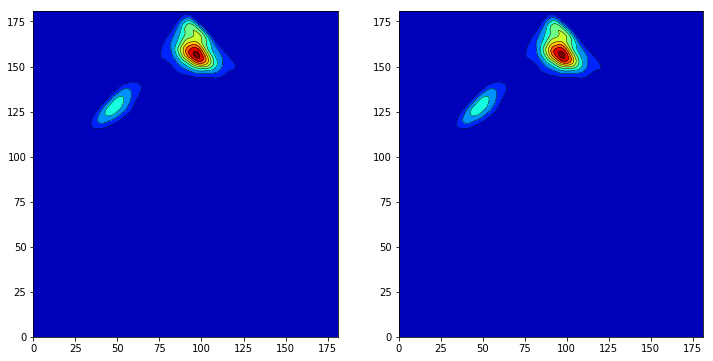

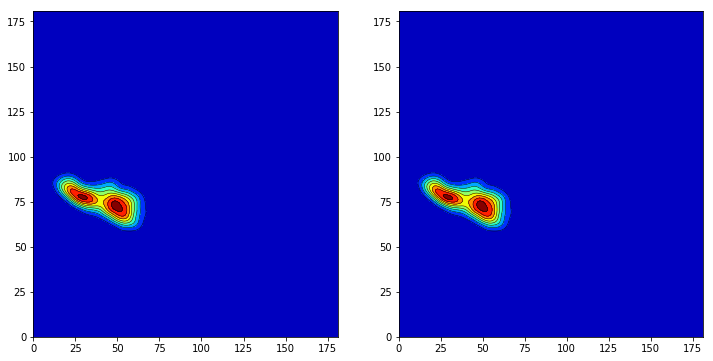

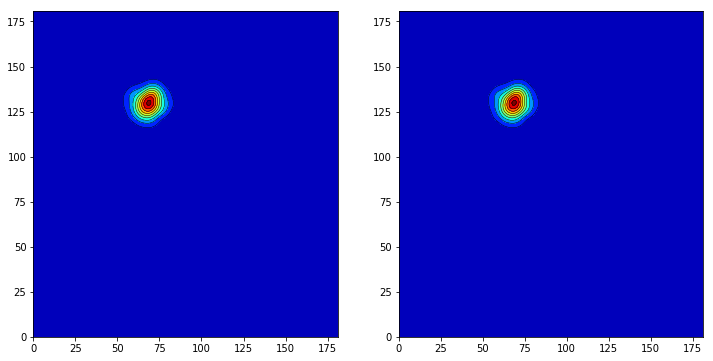

In [65]:
# xvgstuff.plot_multiple_matrix_mpl((Z_classic_left,Z_classic_right,Z_classic_upsd,Z_classic_casual),(1,4),w=18)
xvgstuff.plot_multiple_matrix_mpl((Z_classic_left,Z_classic_left),(1,2),w=12,h=6)
xvgstuff.plot_multiple_matrix_mpl((Z_classic_right,Z_classic_right),(1,2),w=12,h=6)
xvgstuff.plot_multiple_matrix_mpl((Z_classic_upsd,Z_classic_upsd),(1,2),w=12,h=6)
xvgstuff.plot_multiple_matrix_mpl((Z_classic_casual,Z_classic_casual),(1,2),w=12,h=6)



#### WTMETAD

In [7]:
#protx_metad_1ang from CREST

%cd $protx1_classic
angles_protx1_classic=xvgstuff.read_angle_matrix('angles.dat')
Z_classic = ndimage.gaussian_filter(angles_protx1_classic.values, sigma=2, order=0) #This is the smoothing part, it uses a gaussian kernel to smooth the too sharp distribution that we have. Sigma have been choosen for it to look good.

# %cd $protx1_wt_1ang_ex
# angles_protx1_wt_1ang_35b=xvgstuff.read_angle_matrix('angles.dat')
# Z2 = ndimage.gaussian_filter(angles_protx1_wt_1ang_35b.values, sigma=2, order=0) #This is the smoothing part, it uses a gaussian kernel to smooth the too sharp distribution that we have. Sigma have been choosen for it to look good.

# %cd $protx1_wt_2ang_ex
# angles_protx1_wt_2ang_35b=xvgstuff.read_angle_matrix('angles.dat')
# Z3 = ndimage.gaussian_filter(angles_protx1_wt_2ang_35b.values, sigma=2, order=0) #This is the smoothing part, it uses a gaussian kernel to smooth the too sharp distribution that we have. Sigma have been choosen for it to look good.


%cd $protx1_wt_1ang_40b
angles_protx1_wt_1ang_40b=xvgstuff.read_angle_matrix('angles.dat')
Z1 = ndimage.gaussian_filter(angles_protx1_wt_1ang_40b.values, sigma=2, order=0) #This is the smoothing part, it uses a gaussian kernel to smooth the too sharp distribution that we have. Sigma have been choosen for it to look good.

%cd $protx1_wt_2ang_40b
angles_protx1_wt_2ang_40b=xvgstuff.read_angle_matrix('angles.dat')
Z2 = ndimage.gaussian_filter(angles_protx1_wt_2ang_40b.values, sigma=2, order=0) #This is the smoothing part, it uses a gaussian kernel to smooth the too sharp distribution that we have. Sigma have been choosen for it to look good.

%cd $protx1_wt_1ang_40b_wall36
angles_protx1_wt_1ang_40b_wall36=xvgstuff.read_angle_matrix('angles.dat')
Z3 = ndimage.gaussian_filter(angles_protx1_wt_1ang_40b_wall36.values, sigma=2, order=0)

%cd $protx1_wt_2ang_40b_wall36
angles_protx1_wt_2ang_40b_wall36=xvgstuff.read_angle_matrix('angles.dat')
Z4 = ndimage.gaussian_filter(angles_protx1_wt_2ang_40b_wall36.values, sigma=2, order=0)

/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/protx1_Umbrella_1D_branched_gromos54a7/umbrella_branch_left/npt/2.4
1.4401183378017297
/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/zzOLD_TRIALS/WTMETAD_2walls_1angle_30bias
1.1302538981756116
/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/zzOLD_TRIALS/WTMETAD_2walls_2angle_30bias
0.9675608968793176
/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/zzOLD_TRIALS/WTMETAD_NEW-WALLS_1angle_40bias
1.1920172271427123
/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/pro

The maximum of z 0 which is a  (181, 181) matrix is:  0.00040567348162117963
The maximum of z 1 which is a  (181, 181) matrix is:  0.000343138500994231
The maximum of z 2 which is a  (181, 181) matrix is:  0.0006226462300727503
The maximum of z 3 which is a  (181, 181) matrix is:  0.0005115238061818041


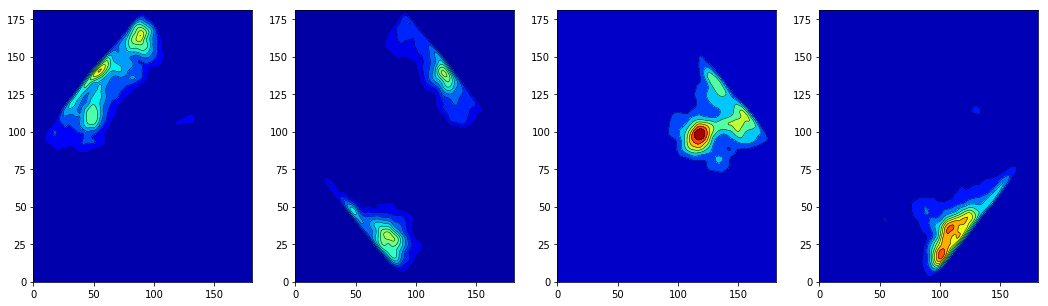

In [33]:
xvgstuff.plot_multiple_matrix_mpl((Z1,Z2,Z3,Z4),(1,4),w=18)

#### BEMETAD

In [24]:
%cd $protx1_be_40b_wall36
angles_protx1_be_40b_wall36_0=xvgstuff.read_angle_matrix("angles0.dat")
Z_be_40b_wall36_0=ndimage.gaussian_filter(angles_protx1_be_40b_wall36_0.values, sigma=2, order=0)
angles_protx1_be_40b_wall36_1=xvgstuff.read_angle_matrix("angles1.dat")
Z_be_40b_wall36_1=ndimage.gaussian_filter(angles_protx1_be_40b_wall36_1.values, sigma=2, order=0)
angles_protx1_be_40b_wall36_2=xvgstuff.read_angle_matrix("angles2.dat")
Z_be_40b_wall36_2=ndimage.gaussian_filter(angles_protx1_be_40b_wall36_2.values, sigma=2, order=0)
angles_protx1_be_40b_wall36_3=xvgstuff.read_angle_matrix("angles3.dat")
Z_be_40b_wall36_3=ndimage.gaussian_filter(angles_protx1_be_40b_wall36_3.values, sigma=2, order=0)

%cd $protx1_be_60b_wall36
angles_protx1_be_60b_wall36_0=xvgstuff.read_angle_matrix("angles0.dat")
Z_be_60b_wall36_0=ndimage.gaussian_filter(angles_protx1_be_60b_wall36_0.values, sigma=2, order=0)
angles_protx1_be_60b_wall36_1=xvgstuff.read_angle_matrix("angles1.dat")
Z_be_60b_wall36_1=ndimage.gaussian_filter(angles_protx1_be_60b_wall36_0.values, sigma=2, order=0)
angles_protx1_be_60b_wall36_2=xvgstuff.read_angle_matrix("angles2.dat")
Z_be_60b_wall36_2=ndimage.gaussian_filter(angles_protx1_be_60b_wall36_2.values, sigma=2, order=0)
angles_protx1_be_60b_wall36_3=xvgstuff.read_angle_matrix("angles3.dat")
Z_be_60b_wall36_3=ndimage.gaussian_filter(angles_protx1_be_60b_wall36_3.values, sigma=2, order=0)

%cd $protx1_be_40b_wall44
angles_protx1_be_40b_wall44_0=xvgstuff.read_angle_matrix("angles0.dat")
Z_be_40b_wall44_0=ndimage.gaussian_filter(angles_protx1_be_40b_wall44_0.values, sigma=2, order=0)
angles_protx1_be_40b_wall44_1=xvgstuff.read_angle_matrix("angles1.dat")
Z_be_40b_wall44_1=ndimage.gaussian_filter(angles_protx1_be_40b_wall44_1.values, sigma=2, order=0)
angles_protx1_be_40b_wall44_2=xvgstuff.read_angle_matrix("angles2.dat")
Z_be_40b_wall44_2=ndimage.gaussian_filter(angles_protx1_be_40b_wall44_2.values, sigma=2, order=0)
angles_protx1_be_40b_wall44_3=xvgstuff.read_angle_matrix("angles3.dat")
Z_be_40b_wall44_3=ndimage.gaussian_filter(angles_protx1_be_40b_wall44_3.values, sigma=2, order=0)

%cd $protx1_be_60b_wall44
angles_last50ns_protx1_be_60b_wall44_0=xvgstuff.read_angle_matrix("angles_last50ns0.dat")
Z_be_60b_wall44_0=ndimage.gaussian_filter(angles_last50ns_protx1_be_60b_wall44_0.values, sigma=2, order=0)
angles_last50ns_protx1_be_60b_wall44_1=xvgstuff.read_angle_matrix("angles_last50ns1.dat")
Z_be_60b_wall44_1=ndimage.gaussian_filter(angles_last50ns_protx1_be_60b_wall44_0.values, sigma=2, order=0)
angles_last50ns_protx1_be_60b_wall44_2=xvgstuff.read_angle_matrix("angles_last50ns2.dat")
Z_be_60b_wall44_2=ndimage.gaussian_filter(angles_last50ns_protx1_be_60b_wall44_2.values, sigma=2, order=0)
angles_last50ns_protx1_be_60b_wall44_3=xvgstuff.read_angle_matrix("angles_last50ns3.dat")
Z_be_60b_wall44_3=ndimage.gaussian_filter(angles_last50ns_protx1_be_60b_wall44_3.values, sigma=2, order=0)

/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/BEMETAD_NEW-WALLS_2angles_40bias
1.480799092864504
1.5491590287093455
1.4560288493072577
1.6524731451139412
/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/BEMETAD_NEW-WALLS_2angles_60bias
1.385721359852893
1.4849258516587047
1.3874707574661198
1.5907886533670867
/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/BEMETAD_2angles_bias-40_Walls-4.4
1.232906257091151
1.5120536829518176
1.4395686770655967
1.5915753085091076
/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/BEMETAD_2angles_bias-60_Walls-4.4
1.4299091869145193
1.5761481941995252

ROW1: Bias40, Wall36
ROW2: Bias60, Wall36
ROW1: Bias40, Wall44
ROW1: Bias60, Wall36
The maximum of z 0 which is a  (181, 181) matrix is:  0.00141915661491429
The maximum of z 1 which is a  (181, 181) matrix is:  0.0016291341836233725
The maximum of z 2 which is a  (181, 181) matrix is:  0.0015303754820411124
The maximum of z 3 which is a  (181, 181) matrix is:  0.0030632204859117875
The maximum of z 0 which is a  (181, 181) matrix is:  0.0011509637335614354
The maximum of z 1 which is a  (181, 181) matrix is:  0.0011509637335614354
The maximum of z 2 which is a  (181, 181) matrix is:  0.0012873229525729168
The maximum of z 3 which is a  (181, 181) matrix is:  0.002448704880821403
The maximum of z 0 which is a  (181, 181) matrix is:  0.000965969199609834
The maximum of z 1 which is a  (181, 181) matrix is:  0.0015665696685171122
The maximum of z 2 which is a  (181, 181) matrix is:  0.0016711023251360121
The maximum of z 3 which is a  (181, 181) matrix is:  0.00248135195138266
The maximu

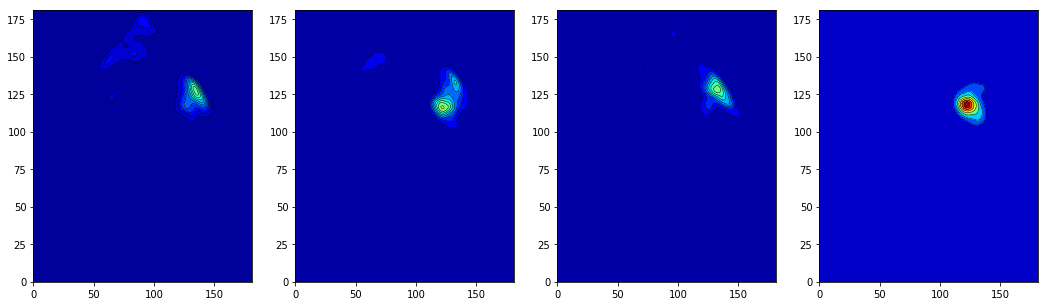

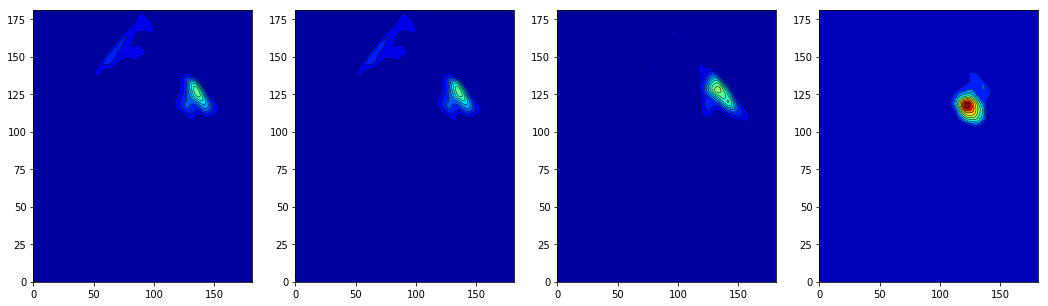

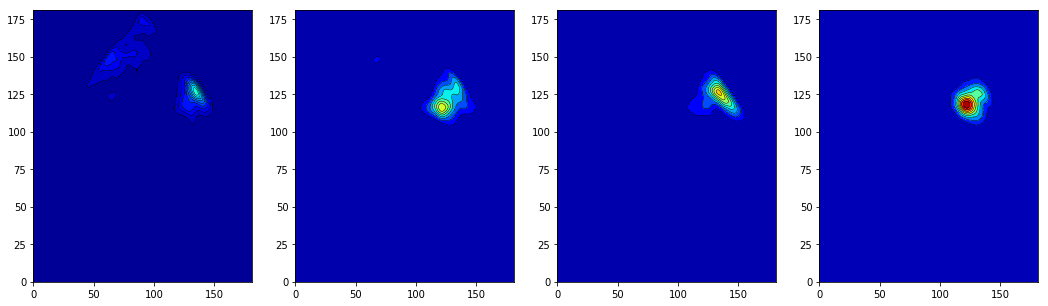

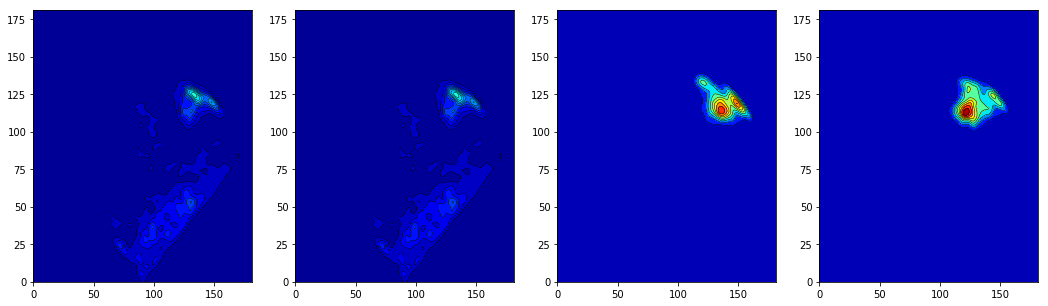

In [31]:
print 'ROW1: Bias40, Wall36'
print 'ROW2: Bias60, Wall36'
print 'ROW1: Bias40, Wall44'
print 'ROW1: Bias60, Wall36'

xvgstuff.plot_multiple_matrix_mpl((Z_be_40b_wall36_0,Z_be_40b_wall36_1,Z_be_40b_wall36_2,Z_be_40b_wall36_3),(1,4),w=18)
xvgstuff.plot_multiple_matrix_mpl((Z_be_60b_wall36_0,Z_be_60b_wall36_1,Z_be_60b_wall36_2,Z_be_60b_wall36_3 ),(1,4),w=18)
xvgstuff.plot_multiple_matrix_mpl((Z_be_40b_wall44_0,Z_be_40b_wall44_1,Z_be_40b_wall44_2,Z_be_40b_wall44_3),(1,4),w=18)
xvgstuff.plot_multiple_matrix_mpl((Z_be_60b_wall44_0,Z_be_60b_wall44_1,Z_be_60b_wall44_2,Z_be_60b_wall44_3),(1,4),w=18)

#### PBMETAD

In [17]:
%cd $protx1_pb_3ang_40b
angles_protx1_pb_3ang_40b=xvgstuff.read_angle_matrix("angles.dat")
Z_protx1_pb_3ang_40b=ndimage.gaussian_filter(angles_protx1_pb_3ang_40b.values, sigma=2, order=0)

%cd $protx1_pb_3ang_60b
angles_protx1_pb_3ang_60b=xvgstuff.read_angle_matrix("angles.dat")
Z_protx1_pb_3ang_60b=ndimage.gaussian_filter(angles_protx1_pb_3ang_60b.values, sigma=2, order=0)

%cd $protx1_pb_3ang_100b
angles_protx1_pb_3ang_100b=xvgstuff.read_angle_matrix("angles.dat")
Z_protx1_pb_3ang_100b=ndimage.gaussian_filter(angles_protx1_pb_3ang_100b.values, sigma=2, order=0)

/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/PBMETAD_PROTX1.angles-abg_bias-40_wall-4.6_magnus
1.1920172271427123
/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/PBMETAD_PROTX1.angles-abg_bias-60_wall-4.6_magnus
1.0543801106275954
/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/PBMETAD_PROTX1.angles-abg_bias-100_wall-4.6_magnus
1.0448865569906518


The maximum of z 0 which is a  (181, 181) matrix is:  0.0022332795352521737
The maximum of z 1 which is a  (181, 181) matrix is:  0.0006226462300727503
The maximum of z 0 which is a  (181, 181) matrix is:  0.0022332795352521737
The maximum of z 1 which is a  (181, 181) matrix is:  0.0005289844575841363
The maximum of z 0 which is a  (181, 181) matrix is:  0.0022332795352521737
The maximum of z 1 which is a  (181, 181) matrix is:  0.0004430041911881176


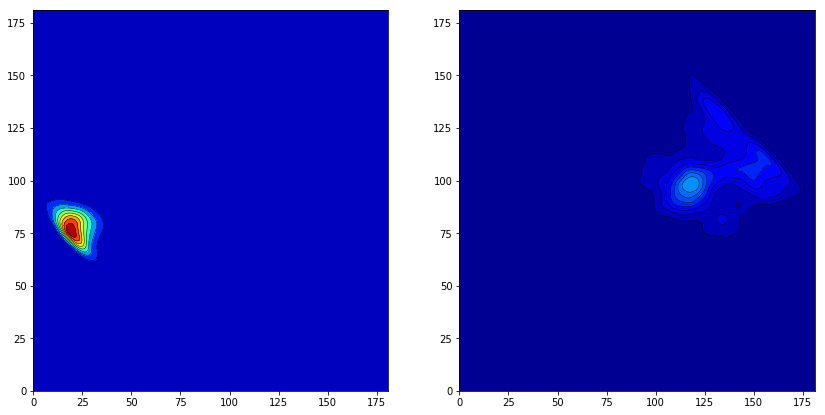

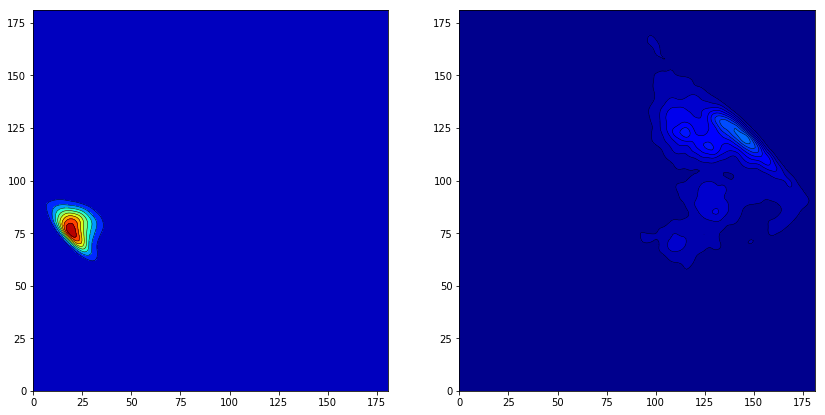

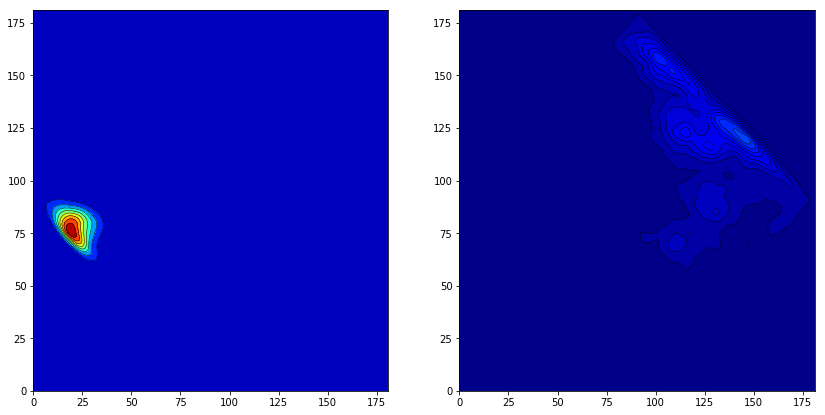

In [13]:
xvgstuff.plot_multiple_matrix_mpl((Z_classic,Z_protx1_pb_3ang_40b),(1,2),w=14,h=7)
xvgstuff.plot_multiple_matrix_mpl((Z_classic,Z_protx1_pb_3ang_60b),(1,2),w=14,h=7)
xvgstuff.plot_multiple_matrix_mpl((Z_classic,Z_protx1_pb_3ang_100b),(1,2),w=14,h=7)

/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/PBMETAD_PROTX1.angles-abg_bias-40_wall-4.6_magnus/angles_vs_time
1.3352764133318185
1.177416759090271
1.1308802771102042
1.146125317885445
1.2035432940890165
1.2178809255848368
The maximum of z 0 which is a  (181, 181) matrix is:  0.00035687777683086956
The maximum of z 1 which is a  (181, 181) matrix is:  0.0005493908894878687
The maximum of z 2 which is a  (181, 181) matrix is:  0.0007083825380166892
The maximum of z 3 which is a  (181, 181) matrix is:  0.0005598046313482683


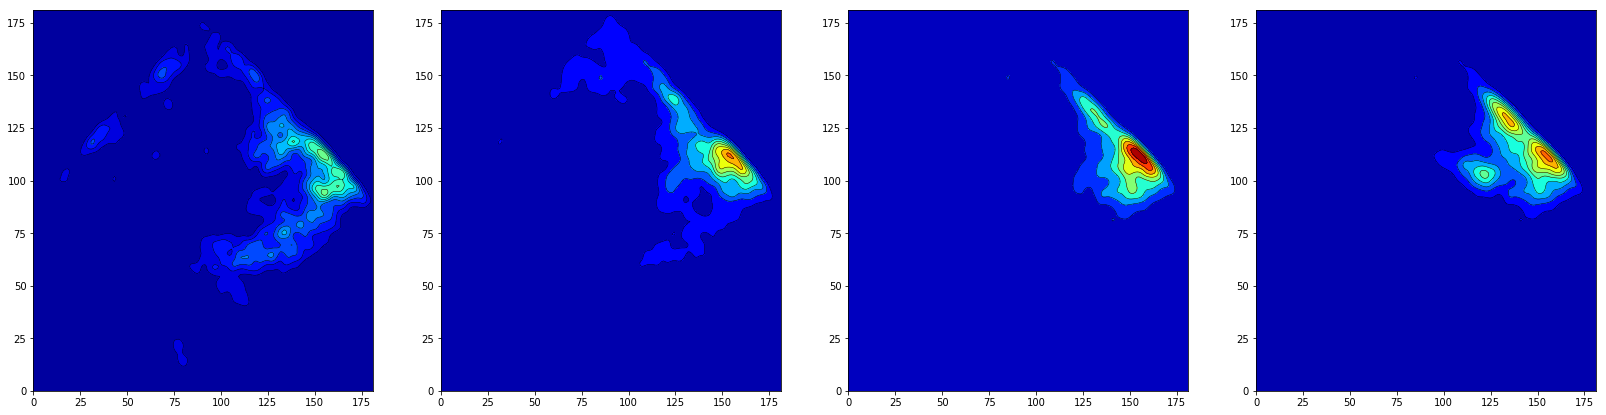

In [18]:
%cd /mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/PBMETAD_PROTX1.angles-abg_bias-40_wall-4.6_magnus/angles_vs_time
angleslist=[]
vec=range(5000,35000,5000)
for i in vec:
    temp=xvgstuff.read_angle_matrix("angles_"+str(i)+".dat")
    angleslist.append(ndimage.gaussian_filter(temp.values, sigma=2, order=0))
    


xvgstuff.plot_multiple_matrix_mpl((angleslist[0],angleslist[1],angleslist[2],angleslist[3]),(1,4),w=28,h=7)

In [4]:
%cd $protx1_pb_3ang_40b_gromos54a8
angles_protx1_pb_3ang_40b_gromos54a8=xvgstuff.read_angle_matrix("angles.dat")
Z_protx1_pb_3ang_40b_gromos54a8=ndimage.gaussian_filter(angles_protx1_pb_3ang_40b_gromos54a8.values, sigma=2, order=0)

/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/GROMOS54a8_PBMETAD_PROTX1.angles-abg_bias-40_wall-4.6_magnus
1.143641322688412


In [5]:
%cd $protx1_pb_3ang_60b_gromos54a8
angles_protx1_pb_3ang_60b_gromos54a8=xvgstuff.read_angle_matrix("angles.dat")
Z_protx1_pb_3ang_60b_gromos54a8=ndimage.gaussian_filter(angles_protx1_pb_3ang_60b_gromos54a8.values, sigma=2, order=0)

/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/GROMOS54a8_PBMETAD_PROTX1.angles-abg_bias-60_wall-4.6_magnus
0.9740716850876174


The maximum of z 0 which is a  (181, 181) matrix is:  0.00041801975307888
The maximum of z 1 which is a  (181, 181) matrix is:  0.0004414264109565395


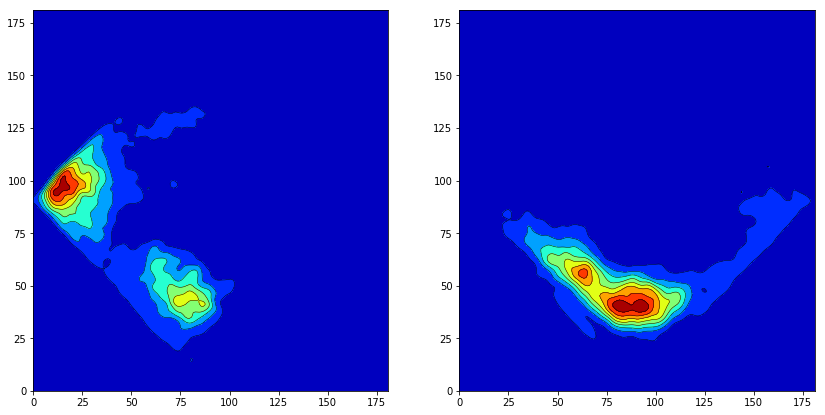

In [6]:
xvgstuff.plot_multiple_matrix_mpl((Z_protx1_pb_3ang_40b_gromos54a8,Z_protx1_pb_3ang_60b_gromos54a8),(1,2),w=14,h=7)

/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/GROMOS54a8_PBMETAD_PROTX1.angles-abg_bias-60_wall-4.6_magnus/fes_vs_time
1.3404324088797521
1.0750628615455997
1.0833063106488738
1.138348626616015
The maximum of z 0 which is a  (181, 181) matrix is:  0.00035865144587313136
The maximum of z 1 which is a  (181, 181) matrix is:  0.00030289936351776437
The maximum of z 2 which is a  (181, 181) matrix is:  0.0005198616689096884
The maximum of z 3 which is a  (181, 181) matrix is:  0.0005492215692205588


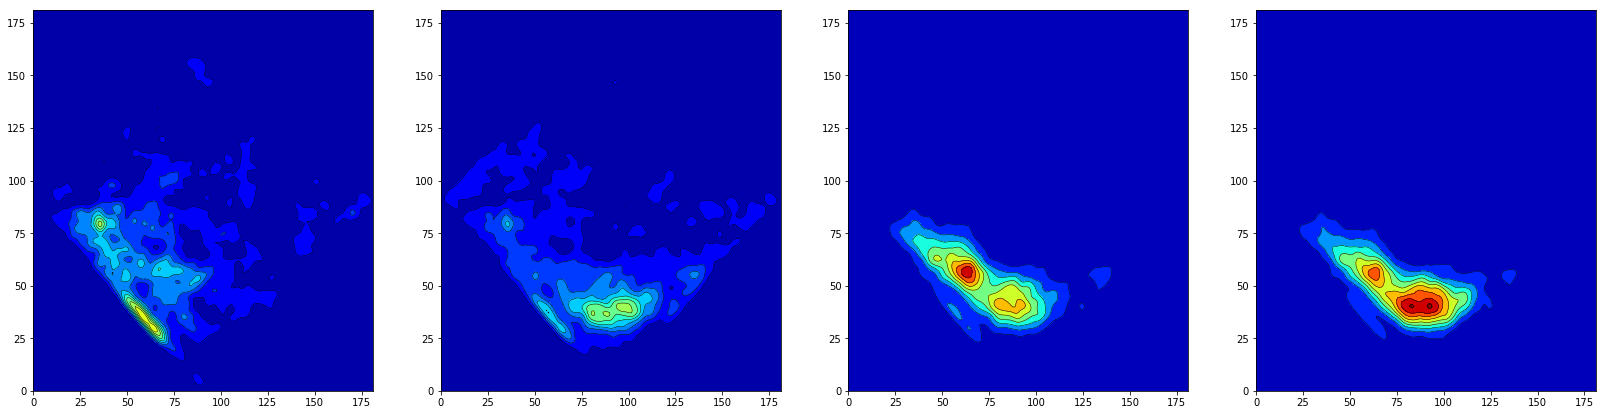

In [19]:
%cd /mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/GROMOS54a8_PBMETAD_PROTX1.angles-abg_bias-60_wall-4.6_magnus/fes_vs_time
angleslist=[]
vec=range(5000,25000,5000)
for i in vec:
    temp=xvgstuff.read_angle_matrix("angles_"+str(i)+".dat")
    angleslist.append(ndimage.gaussian_filter(temp.values, sigma=2, order=0))
    


xvgstuff.plot_multiple_matrix_mpl((angleslist[0],angleslist[1],angleslist[2],angleslist[3]),(1,4),w=28,h=7)

In [15]:
%cd $protx1_pb_3ang_40b_gromos54a8
plot_2d_map_plotly('angles.dat')

/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/GROMOS54a8_PBMETAD_PROTX1.angles-abg_bias-40_wall-4.6_magnus
1.064234255410233
This is the format of your plot grid:
[ (1,1) x1,y1 ]



The maximum of z 0 which is a  (181, 181) matrix is:  0.0004430041911881176
The maximum of z 1 which is a  (181, 181) matrix is:  0.0003435474474546207


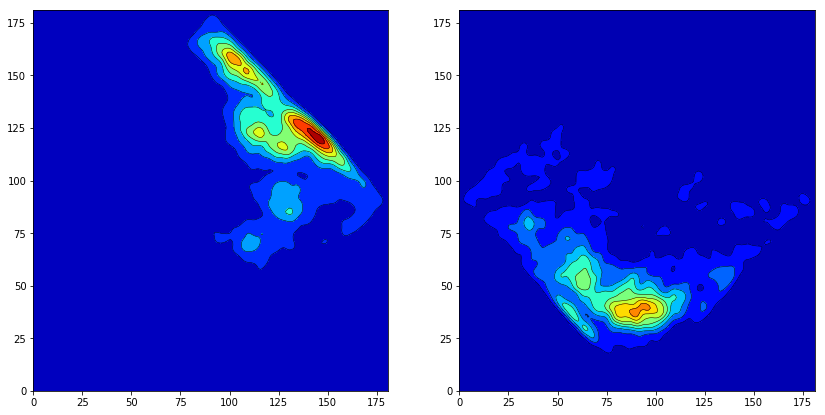

In [14]:
xvgstuff.plot_multiple_matrix_mpl((Z_protx1_pb_3ang_100b,Z_protx1_pb_3ang_40b_gromos54a8),(1,2),w=14,h=7)

#### TEMP FOR CONFERENCE 

In [10]:
# %cd $protx1_pb_3ang_40b
# plot_2d_map_plotly('angles.dat')

# %cd $protx1_pb_3ang_60b
# plot_2d_map_plotly('angles.dat')

# %cd $protx1_pb_3ang_100b
# plot_2d_map_plotly('angles.dat')

%cd $protx1_pb_3ang_40b_gromos54a8
plot_2d_map_plotly('angles.dat')



/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/GROMOS54a8_PBMETAD_PROTX1.angles-abg_bias-40_wall-4.6_magnus
1.1769739559898251
This is the format of your plot grid:
[ (1,1) x1,y1 ]



In [8]:
%cd $protx1_pb_3ang_40b_gromos54a8
df_gromos54a8=merge_columns_in_df(file1='angles.dat',file2='COLVAR',round1=[0,1],round2=[0,1])


/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/GROMOS54a8_PBMETAD_PROTX1.angles-abg_bias-40_wall-4.6_magnus


In [194]:
%cd /mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/GROMOS54A8/PROTOX1_classical_umbrella/PROTX1_equil_with_prot_exact-parameters/umbrella_sampling/2.4
plot_2d_map_plotly('angles.dat')

/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/GROMOS54A8/PROTOX1_classical_umbrella/PROTX1_equil_with_prot_exact-parameters/umbrella_sampling/2.4
1.7580182719627515
This is the format of your plot grid:
[ (1,1) x1,y1 ]



### ANGLES VS TIME

In [ ]:
%cd $protx1_be_60b_wall44
df_0=np.loadtxt('angles0.dat',skiprows=2,)
df_0=pd.DataFrame(df_0)
df_0.plot(x=0)

%cd $protx1_be_40b_wall36
df_0=np.loadtxt('angles0.dat',skiprows=2,)
df_0=pd.DataFrame(df_0)
df_0.plot(x=0)

In [26]:
# %cd /mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/METAD_2walls_1angle_check
%cd /mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/METAD_2walls_3angle_check

df=xvgstuff.xvgtotable_notitles('COLVAR_REAL')
df.head()
accz=accalfa=accbeta=count=0
rowprevz=rowprevalfa=rowprevbeta=0
for index, row in df.iterrows():
    if (index==0):
        rowprevz=row[1]
        rowprevalfa=row[2]
        count+=1
        continue
    else:    
        accz+=np.abs(row[1]-rowprevz)
        accalfa+=np.abs(row[2]-rowprevalfa)
        rowprevz=row[1]
        rowprevalfa=row[2]
        count+=1
#         if (index==5):
#             break

print(accz/count,accalfa/count)

/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/METAD_2walls_3angle_check


KeyboardInterrupt: 

In [18]:
%cd /mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/METAD_2walls_3angle_check

# fes_3angles=pd.read_table('fes_d1z.dat',skiprows=14,delim_whitespace=True,names=["d1z","alfa","beta","free","derz","deralfa","derbeta"])
fes_3angles=pd.read_table('fes_d1z.dat',skiprows=5,delim_whitespace=True,names=["d1z","projection"])
fes_3angles.head()

fes_3angles.describe()

trace1= go.Scatter(
        x=fes_3angles['d1z'].iloc[0:10000], # It could be for example df['col1']
        y=fes_3angles['projection'].iloc[0:10000],
        name="APL"
        )
# trace2= go.Scatter(
#         x=fes_3angles['alfa'], 
#         y=fes_3angles['free'],
#         name="APL"
#         )
# trace3= go.Scatter(
#         x=fes_3angles['beta'], 
#         y=fes_3angles['free'],
#         name="APL"
#         )

    

#figplane = tools.make_subplots(rows=1, cols=3, 
#                           subplot_titles=('z free energy', 
#                                           'alfa free energy',
#                                           'beta free energy'),
# )

#DEFINE THE TRACES
#pmf_lim_11w
#figplane.append_trace(trace1, 1, 1)
# figplane.append_trace(trace2, 1, 2)
# figplane.append_trace(trace3, 1, 3)
py.offline.iplot([trace1])

/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/METAD_2walls_3angle_check


d1z  projection
0  1.941890   -6.290145
1  1.952456   -6.290336
2  1.963022   -6.291036
3  1.973589   -6.293584
4  1.984155   -6.304741

In [46]:
%cd /mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/METAD_2walls_1angle_check
fes_1angles=pd.read_table('fes_3angles.dat',skiprows=5,delim_whitespace=True,names=["d1z","projection"])
fes_1angles.head()

fes_1angles.describe()

trace1= go.Scatter(
        x=fes_1angles['d1z'].iloc[0:10000], # It could be for example df['col1']
        y=fes_1angles['projection'].iloc[0:10000],
        name="APL"
        )

py.offline.iplot([trace1])

/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/METAD_2walls_1angle_check


IOError: File fes_3angles.dat does not exist

# PMFs ANALYSIS 

## CLASSIC MD

In [4]:
%cd $protx1_classical_left
pmf_protx1_classical_left=xvgstuff.xvgtotable_notitles('PMF/profile_avg_stdev_200bs.xvg')

%cd $protx1_classical_right
pmf_protx1_classical_right=xvgstuff.xvgtotable_notitles('PMF/profile_avg_stdev_200bs.xvg')

%cd $protx1_classical_upsd
pmf_protx1_classical_upsd=xvgstuff.xvgtotable_notitles('PMF/profile_avg_stdev_200bs.xvg')

data=[ 
    go.Scatter(
        x=pmf_protx1_classical_left[0], # assign x as the dataframe column 'x'
        y=pmf_protx1_classical_left[1], #-22.5,
        name="pmf_lim_popc_bs",
        error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=pmf_protx1_classical_left[2],
            visible=True),
    ),
    go.Scatter(
        x=pmf_protx1_classical_right[0], # assign x as the dataframe column 'x'
        y=pmf_protx1_classical_right[1], #-22.5,
        name="pmf_lim_popc_bs",
        error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=pmf_protx1_classical_right[2],
            visible=True),
    ),
    go.Scatter(
        x=pmf_protx1_classical_upsd[0], # assign x as the dataframe column 'x'
        y=pmf_protx1_classical_upsd[1], #-22.5,
        name="pmf_lim_popc_bs",
        error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=pmf_protx1_classical_upsd[2],
            visible=True),
    ),
]

py.offline.iplot(data)

/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/protx1_Umbrella_1D_branched_gromos54a7/umbrella_branch_left/npt
/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/protx1_Umbrella_1D_branched_gromos54a7/umbrella_branch_right/npt
/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/protx1_Umbrella_1D_branched_gromos54a7/umbrella_branch_upsidedown/npt


In [ ]:
go.Scatter(
        x=pmf_protx1_classical_upsd[0], # assign x as the dataframe column 'x'
        y=pmf_protx1_classical_upsd[1], #-22.5,
        name="pmf_lim_popc_bs",
        error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=pmf_protx1_classical_upsd[2],
            visible=True),
    ),

## METAD

In [5]:
%cd $protx1_wtmetad_beta
data=[]
for i in range(24,27):
    pmf_lim_dmpc_wtbeta_Z_temp=xvgstuff.xvgtotable_notitles('convergence/fes_d1z'+str(i)+'.dat')
    trace = go.Scatter(
            x=pmf_lim_dmpc_wtbeta_Z_temp[0], # assign x as the dataframe column 'x'
            y=pmf_lim_dmpc_wtbeta_Z_temp[1], #-22.5,
            name="pmf_lim_dmpc_beta_"+str(i)+"0ns",
        )
    data.append(trace)

py.offline.iplot(data)

#######################################################################
%cd $protx1_wtmetad_beta
data=[]
for i in range(24,27):
    pmf_lim_dmpc_wtbeta_BETA_temp=xvgstuff.xvgtotable_notitles('convergence/fes_BETA'+str(i)+'.dat')
    trace = go.Scatter(
            x=pmf_lim_dmpc_wtbeta_BETA_temp[0], # assign x as the dataframe column 'x'
            y=pmf_lim_dmpc_wtbeta_BETA_temp[1], #-22.5,
            name="pmf_lim_dmpc_beta_"+str(i)+"0ns",
        )
    data.append(trace)


py.offline.iplot(data)
#######################################################################
%cd $protx1_wtmetad_ab
data=[]
for i in range(25,30):
    pmf_lim_dmpc_wtab_Z_temp=xvgstuff.xvgtotable_notitles('convergence/fes_d1z'+str(i)+'.dat')
    trace = go.Scatter(
            x=pmf_lim_dmpc_wtab_Z_temp[0], # assign x as the dataframe column 'x'
            y=pmf_lim_dmpc_wtab_Z_temp[1], #-22.5,
            name="pmf_lim_dmpc_h2_"+str(i)+"0ns",
        )
    data.append(trace)

py.offline.iplot(data)

#######################################################################
%cd $protx1_wtmetad_ab
data=[]
for i in range(25,30):
    pmf_lim_dmpc_wtab_AB_temp=xvgstuff.xvgtotable_notitles('convergence/fes_ALFA'+str(i)+'.dat')
    trace = go.Scatter(
            x=pmf_lim_dmpc_wtab_AB_temp[0], # assign x as the dataframe column 'x'
            y=pmf_lim_dmpc_wtab_AB_temp[1], #-22.5,
            name="pmf_lim_dmpc_h2_"+str(i)+"0ns",
        )
    data.append(trace)

py.offline.iplot(data)
#######################################################################

%cd $protx1_wtmetad_ab
data=[]
for i in range(25,30):
    pmf_lim_dmpc_wtab_AB_temp=xvgstuff.xvgtotable_notitles('convergence/fes_BETA'+str(i)+'.dat')
    trace = go.Scatter(
            x=pmf_lim_dmpc_wtab_AB_temp[0], # assign x as the dataframe column 'x'
            y=pmf_lim_dmpc_wtab_AB_temp[1], #-22.5,
            name="pmf_lim_dmpc_h2_"+str(i)+"0ns",
        )
    data.append(trace)

py.offline.iplot(data)


/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/WTMETAD_2walls_1angle_check


/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/WTMETAD_2walls_1angle_check


/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/WTMETAD_2walls_2angle_check


/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/WTMETAD_2walls_2angle_check


/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/WTMETAD_2walls_2angle_check


# PROPERTIES vs TIME

## CVs vs TIME

### MetaD

#### Z and BETA

In [ ]:
%cd $protx1_wtmetad_beta

df_beta=xvgstuff.xvgtotable_notitles('COLVAR_REAL')

trace = go.Scatter(
            x=df_beta[0], # assign x as the dataframe column 'x'
            y=df_beta[1], #-22.5,
            name="d1z vs time",
        )
data.append(trace)

py.offline.iplot([trace])


trace = go.Scatter(
            x=df_beta[0], # assign x as the dataframe column 'x'
            y=df_beta[2], #-22.5,
            name="BETA vs time",
        )
data.append(trace)

py.offline.iplot([trace])


/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/MetaD_and_Tass/protx1_MetaD/WTMETAD_2walls_1angle_check


#### Z , ALFA and BETA

In [ ]:
%cd $protx1_wtmetad_ab

df_ab=xvgstuff.xvgtotable_notitles('COLVAR_REAL')

trace = go.Scatter(
            x=df_ab[0], # assign x as the dataframe column 'x'
            y=df_ab[1], #-22.5,
            name="d1z vs time",
        )
data.append(trace)

py.offline.iplot([trace])


trace = go.Scatter(
            x=df_ab[0], # assign x as the dataframe column 'x'
            y=df_ab[2], #-22.5,
            name="ab vs time",
        )
data.append(trace)

py.offline.iplot([trace])


## APL 

/mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/POPC_gromos54a8_trial/equil_with_prot_exact-parameters


Time          Box-X          Box-Y          Box-Z  \
count  322227.000000  322227.000000  322227.000000  322227.000000   
mean   161112.999997       6.074948       6.393641      11.324353   
std     93019.066927       0.058958       0.062051       0.217815   
min         0.000000       5.887101       6.195939      10.551331   
25%     80556.500000       6.038185       6.354949      11.186283   
50%    161113.000000       6.077946       6.396795      11.310814   
75%    241669.500000       6.111797       6.432423      11.459143   
max    322225.020000       6.301466       6.632041      12.048689   

                 APL  
count  322227.000000  
mean        0.606948  
std         0.011778  
min         0.569939  
25%         0.599568  
50%         0.607490  
75%         0.614276  
max         0.652993

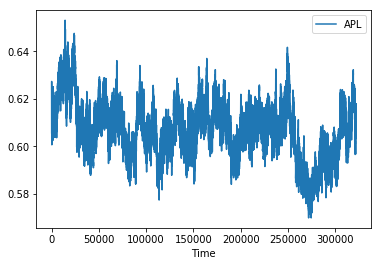

In [63]:
%cd /mnt/R_drive/Biomolecular_Model-MANCER-HS00092/Characterization_of_molecular_interactions_of_venom_peptides_with_membranes/CLASSICAL/POPC_gromos54a8_trial/equil_with_prot_exact-parameters
df=xvgstuff.xvgtotable("box.xvg")
df['APL']=(df['Box-X']*df['Box-Y'] )/64
df.plot(x='Time',y='APL')
df.describe()

0         0.605663
1         0.627277
2         0.624866
3         0.620906
4         0.618090
5         0.616249
6         0.614974
7         0.613865
8         0.613966
9         0.614420
10        0.615430
11        0.614698
12        0.614660
13        0.615358
14        0.615323
15        0.613837
16        0.612887
17        0.612489
18        0.612361
19        0.612106
20        0.611112
21        0.609804
22        0.610606
23        0.608262
24        0.608299
25        0.609563
26        0.608918
27        0.609642
28        0.609377
29        0.609946
            ...   
322197    0.610738
322198    0.612863
322199    0.612405
322200    0.612133
322201    0.612390
322202    0.613655
322203    0.613934
322204    0.613833
322205    0.613516
322206    0.613516
322207    0.614890
322208    0.614781
322209    0.613231
322210    0.614499
322211    0.615986
322212    0.616562
322213    0.617341
322214    0.616555
322215    0.617334
322216    0.617830
322217    0.617785
322218    0.